# Estadística Inferencial

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import random as rd

## Fundamentos de estadística inferencial

### Estadística inferencial vs. descriptiva

La estadística descriptiva se centra en entender cómo se comportan los datos en el presente.

La estadística **inferencial** busca **predecir** o deducir **características o resultados** de una población a través de una muestra de esta. 

Partimos de una población y sacamos una muestra; es a partir de la muestra que nos vamos a hacer preguntas. Utilizamos intervalos de confianza para sacar conclusiones y deducciones; hacemos validación de hipótesis, que son teorías que cuestionaremos y vamos a demostrar. También ayuda a evitar sesgos.

Cuando hablamos de inferencia estadística nos referimos a sacar conclusiones que se obtienen a partir de los parámetros de una población de datos y estudiamos el grado de fiabilidad de los resultados del estudio.

**Usos en Machine Learning**

Tanto en un análisis como en un modelo predictivo, la estadística inferencial servirá para:
- Entender la distribución de nuestros datos.
- Crear y validar hipótesis.
- Hacer experimentos.
- Elegir los modelos predictivos adecuados según los datos.

### Estadísticos principales

**Experimento**

Es un procedimiento que puede repetirse infinitamente y tiene un conjunto de bien definido de resultados posibles conocido como *espacio muestral*.

Un experimento puede ser:
- **Aleatorio**: es aquel en el que si lo repetimos con las mismas condiciones iniciales no se pueden garantizar los mismos resultados.
- **Determinista**: es aquel en el que si lo repetimos con las mismas condiciones iniciales se garantiza el mismo resultado.

**Población y muestra**

La población es un conjunto grande, general, sobre el cual podemos hacer una extracción o un subconjunto que será la muestra.

Cuando hacemos esta extracción de los resultados hay que tener en cuenta que debe ser una muestra representativa, es decir, lo suficientemente grande para ser estadísticamente significativa. [Calculadora de tamaño de muestra](https://www.questionpro.com/es/calculadora-de-muestra.html).
Otra cosa a tener en cuenta es tener una representación no sesgada de la población.

**Evento**

Un evento es cada posible resultado de un experimento.

**Variable**

Una variable es una característica que puede tomar diferentes valores. Están las cualitativas, que se refieren a atributos, y las cuantitativas, que son numéricas.

**Probabilidad**

La probabilidad mide qué tan posible es obtener un determinado evento.

### Poblaciones normales

La mayoría de los factores del mundo se rigen bajo una población que sigue una distribución normal.

![](destNorm.PNG)

### Muestreo

Una muestra es una extracción de la población; tenemos que asegurarnos que sean lo suficientemente grandes, o sea, estadísticamente significativa, y que no esté sesgada.

**Tipos de muestreo**
- **Aleatorio simple**: cada uno de los eventos tiene la misma probabilidad de ocurrir.
- **Sistemático**: se seleccionan ciertas unidades al azar y, a continuación, se elige el resto siguiendo intervalos regulares.
- **Estratificado**: se seleccionan ciertas unidades por segmentos exclusivos y homogéneos, o sea, una categoría.

### Teorema del límite central

El teorema del límite central es una teoría estadística que establece que, dada una muestra aleatoria lo suficientemente grande de la población, la distribución de las medias seguirá una distribución normal.

Es decir, si de una población tomamos varias muestras y de cada una de esas muestras calculamos la media, el conjunto de esas medias va a describir una distribución normal; mientras más muestras mas evidente es esa distribución.

Lo importante aquí es entender que no importa el tipo de distribución de esa población, las medias de esas muestras tiendena una distribución normal.

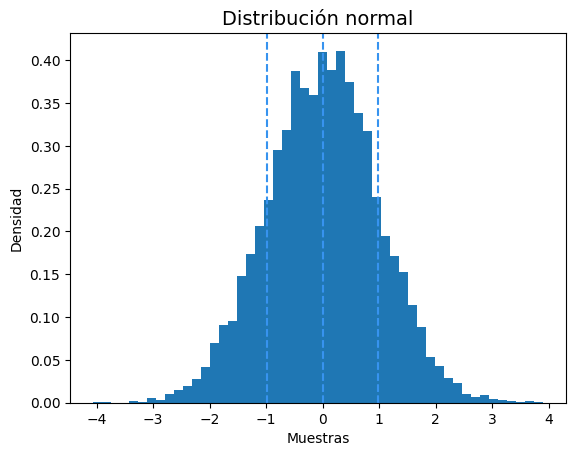

In [4]:
#Generamos una muestra de 10000 elementos con media 0 y desviación estándar 1
normal_samples = np.random.normal(0, 1, size=10000)

#Graficamos nuestros datos
fig, ax = plt.subplots()
plt.hist(normal_samples, bins=50, density=True)
plt.title('Distribución normal', size=14)
plt.xlabel('Muestras')
plt.ylabel('Densidad')
plt.axvline(0, color='#3793ef', linestyle='--')
plt.axvline(np.std(normal_samples), color='#3793ef', linestyle='--')
plt.axvline(-1*np.std(normal_samples), color='#3793ef', linestyle='--')
plt.show()

### Funciones de muestreo

Dataset a trabajar

In [5]:
econdata = pd.read_csv("econdata.csv")
econdata.head()

,id,geo_point_2d,geo_shape,clave_cat,delegacion,perimetro,tipo,nom_id
0,0,"19.424781053,-99.1327537959","{""type"": ""Polygon"", ""coordinates"": [[[-99.1332...",307_130_11,Cuauhtémoc,B,Mercado,Pino Suárez
1,1,"19.4346139576,-99.1413808393","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",002_008_01,Cuautémoc,A,Museo,Museo Nacional de Arquitectura Palacio de Bell...
2,2,"19.4340695945,-99.1306348409","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",006_002_12,Cuautémoc,A,Museo,Santa Teresa
3,3,"19.42489472,-99.12073393","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",323_102_06,Venustiano Carranza,B,Hotel,Balbuena
4,4,"19.42358238,-99.12451093","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",323_115_12,Venustiano Carranza,B,Hotel,real


#### Muestreo aleatorio simple

Importaremos los registros de manera aleatoria a partir de un número de casos sobre la población total para crear una nueva muestra.

In [6]:
# Importamos 8 registros de manera aleatoria
aleatorio8 = econdata.sample(n = 8)
aleatorio8

,id,geo_point_2d,geo_shape,clave_cat,delegacion,perimetro,tipo,nom_id
165,165,"19.4248396624,-99.1333096809","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",001_086_01,Cuautémoc,B,Hotel,Latino
196,196,"19.4437017048,-99.1325438818","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",004_043_06,Cuautémoc,B,Hotel,Boston
94,94,"19.4338001466,-99.1463273233","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",002_016_02,Cuautémoc,B,Museo,Arte Popular
144,144,"19.43846278,-99.14185407","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",003_097_17,Cuautémoc,A,Hotel,Covadonga
6,6,"19.43553422,-99.12324801","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",318_116_11,Venustiano Carranza,B,Hotel,San Antonio Tomatlan
208,208,"19.423857491,-99.1225572301","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",323_108_11,Venustiano Carranza,B,Hotel,Juárez
220,220,"19.4331382067,-99.125997696","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",006_008_08,Cuautémoc,A,Hotel,México Nuevo
135,135,"19.4300009578,-99.1430773295","{""type"": ""Polygon"", ""coordinates"": [[[-99.1431...",002_045_01,Cuauhtémoc,B,Mercado,"Centro Artesanal ""San Juan"""


También podemos seleccionar aleatoriamente un porcentaje de la población

In [7]:
# Selección aleatoria del 25% de los datos
prop25 = econdata.sample(frac = 0.25)
print(prop25.shape)
prop25.head()

(58, 8)


,id,geo_point_2d,geo_shape,clave_cat,delegacion,perimetro,tipo,nom_id
148,148,"19.4388349207,-99.1502578596","{""type"": ""MultiPoint"", ""coordinates"": [[-99.15...",012_147_13,Cuautémoc,B,Hotel,"Miño, S.A. DE C.V."
208,208,"19.423857491,-99.1225572301","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",323_108_11,Venustiano Carranza,B,Hotel,Juárez
41,41,"19.43204901,-99.13440135","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",001_024_09,Cuautémoc,A,Hotel,Gran Hotel de la Ciudad de México
73,73,"19.4218384283,-99.1267852296","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",007_005_07,Cuautémoc,B,Hotel,Jaen
118,118,"19.44371481,-99.14271352","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",003_050_07,Cuautémoc,B,Hotel,Manolete


#### Muestreo sistemático

El muestreo sistemático sirve para hacer extracciones de la población a través de una norma, un intervalo regular de cómo será dicha extracción.

In [8]:
# Definimos una función para este muestreo sistemático; el step es esa norma a seguir
def systematicSampling(data, step):
    # Definimos los índices de los datos que se tomarán; inicia en 0 y va hasta el tamaño del dataset que se pase haciendo un
    # paso igual a la norma que se especifique
    indexes = np.arange(0, len(data), step = step)
    # El muestreo serán los valores correspondientes a los índices
    systematicSample = data.iloc[indexes]
    return systematicSample

# Hacemos un muestreo con un paso de 3
systematicSample = systematicSampling(econdata, 3)
print(systematicSample.shape)
systematicSample.head()

(77, 8)


,id,geo_point_2d,geo_shape,clave_cat,delegacion,perimetro,tipo,nom_id
0,0,"19.424781053,-99.1327537959","{""type"": ""Polygon"", ""coordinates"": [[[-99.1332...",307_130_11,Cuauhtémoc,B,Mercado,Pino Suárez
3,3,"19.42489472,-99.12073393","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",323_102_06,Venustiano Carranza,B,Hotel,Balbuena
6,6,"19.43553422,-99.12324801","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",318_116_11,Venustiano Carranza,B,Hotel,San Antonio Tomatlan
9,9,"19.4407152937,-99.1498060057","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",012_146_22,Cuautémoc,B,Hotel,Detroit
12,12,"19.43990186,-99.14813347","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",003_079_16,Cuautémoc,B,Hotel,La Paz


#### Muestreo estratificado

El muestreo estratificado consiste en crear unidades homogéneas exclusivas y a partir de estas crear muestras aleatorias. 

Los pasos a seguir son:
1. Separar los datos por categorías (valores estratificados)
2. Definir las categorías que queremos en la muestra y su proporción.
3. Tomar tantos datos de cada categoría como sean necesarios para llegar a la proporción deseada.
4. Juntar las muestras de cada categoría para generar un muestreo final.

En este caso crearemos dichas categorías a partir de la delegación y el tipo; esta información la almacenaremos en una nueva variable llamada *estratificado*.

In [9]:
econdata["estratificado"] = econdata["delegacion"] + "," + econdata["tipo"]

# Visualizamos la proporción de cada valor de nuestra nueva variable estratificada
(econdata["estratificado"].value_counts() / len(econdata)).sort_values(ascending = False)

Cuautémoc,Hotel                0.643478
Cuautémoc,Museo                0.156522
Venustiano Carranza,Hotel      0.078261
Cuauhtémoc,Mercado             0.073913
Venustiano Carranza,Mercado    0.047826
Name: estratificado, dtype: float64

Ahora, definimos las siguientes proporciones para nuestras muestras:
- Cuautémoc, Hotel: 0.5,
- Cuautémoc, Museo: 0.2,
- Venustiano Carranza, Hotel: 0.1,
- Cuauhtémoc, Mercado: 0.1,
- Venustiano Carranza, Mercado: 0.1

Para crear dicha proporción a partir de los datos originales utilizaremos la siguiente función que encuentra el número de muestras necesario de cada categoría, hace un muestreo simple dentro de dicha categoría y luego junta esas muestras.

In [10]:

# Definimos la función para realizar el muestre estratificado
# randomState es una semilla para reproducir el mismo muestreo cuando sea necesario
def muestreoEstratificado(data, nombresColumnasEstratificadas, valoresEstratificados, proporcionEstratificacion, randomState = None):
    # Creamos un df vacío con los nombres de las columnas del dataset que se pasa
    dfEstratificado = pd.DataFrame(columns = data.columns)
    
    posicion = -1
    # Iteramos sobre los valores estratificados
    for i in range(len(valoresEstratificados)):
        posicion += 1
        
        # Si es la última iteración entonces que calcule que el número de valores de salida sea igual al de entrada
        if posicion == len(valoresEstratificados) - 1:
            # 
            ratioLongitud = len(data) - len(dfEstratificado)
        else:
            # Sacar el ratio en función de la proporción seleccionada
            ratioLongitud = int(len(data) * proporcionEstratificacion[i])
        
        # Filtramos los datos de origen en función de los valores seleccionados en la estratificación
        dfFiltrado = data[data[nombresColumnasEstratificadas] == valoresEstratificados[i]]
        # Creamos la muestra de los datos filtrados usando el ratio que calculamos
        dfTemp = dfFiltrado.sample(replace = True, n = ratioLongitud, random_state = randomState)
        # Creamos el dataframe estratificado uniéndolo con el temporal
        dfEstratificado = pd.concat([dfEstratificado, dfTemp])
        
    return dfEstratificado

Ahora creamos el muestreo

In [11]:
# Especificamos los valores estratificados
valoresEstratificados = ['Cuautémoc,Hotel', 'Cuautémoc,Museo', 'Venustiano Carranza,Hotel', 'Cuauhtémoc,Mercado', 'Venustiano Carranza,Mercado']
# Especificamos las proporciones
proporcionEstratificados = [0.5, 0.2, 0.1, 0.1, 0.1]
# Realizamos el muestreo
muestraEstratificada = muestreoEstratificado(econdata, "estratificado", valoresEstratificados, proporcionEstratificados, randomState = 42)
print(muestraEstratificada.shape)
muestraEstratificada.head()

(230, 9)


,id,geo_point_2d,geo_shape,clave_cat,delegacion,perimetro,tipo,nom_id,estratificado
164,164,"19.4388741511,-99.1413308257","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",003_113_03,Cuautémoc,B,Hotel,Dos Naciones,"Cuautémoc,Hotel"
142,142,"19.4263681354,-99.1327278126","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",006_127_14,Cuautémoc,A,Hotel,Ambar,"Cuautémoc,Hotel"
27,27,"19.4348360773,-99.1463945583","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",002_016_01,Cuautémoc,B,Hotel,Hilton Centro Histórico,"Cuautémoc,Hotel"
168,168,"19.4349726565,-99.147766133","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",002_014_23,Cuautémoc,B,Hotel,One Alameda,"Cuautémoc,Hotel"
113,113,"19.43374405,-99.13550135","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",001_012_13,Cuautémoc,A,Hotel,San Antonio,"Cuautémoc,Hotel"


Podemos ver la proporción final con el siguiente código

In [12]:
(muestraEstratificada["estratificado"].value_counts() / len(muestraEstratificada)).sort_values(ascending = False)

Cuautémoc,Hotel                0.5
Cuautémoc,Museo                0.2
Venustiano Carranza,Hotel      0.1
Cuauhtémoc,Mercado             0.1
Venustiano Carranza,Mercado    0.1
Name: estratificado, dtype: float64

## Estadísticos y cálculos

### Media, moda y mediana

- Media: el valor que representa un conjunto de valores.
- Moda: el valor que más se repite.
- Mediana: el valor del centro (una vez ordenado los datos).

### Media muestral

La media muestral es la media aritmética, el promedio de las observaciones; la media muestral es diferente a la media poblacional al ser la muestra una extracción de la población.

### Varianza y desviación estándar muestral

La varianza indica qué tan dispersos están los datos respecto a la media pero sus unidades están al cuadrado así que para quedar en las mismas unidades utilizamos la desviación estándar, que es la raíz cuadrada de la varianza.

![](formulas.jpg)

Cargamos el dataset

In [13]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Queremos analizar la variable *sepal_length*

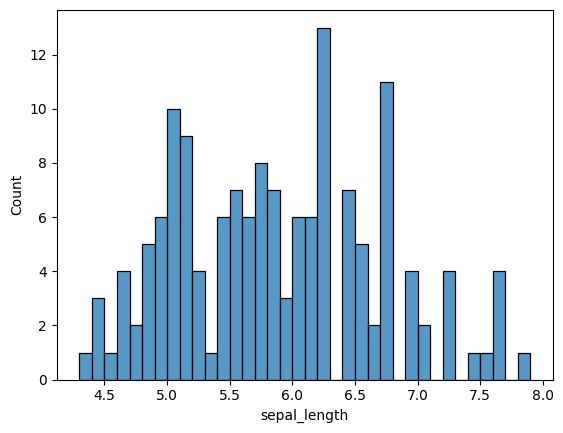

In [14]:
sns.histplot(
    data = iris,
    x = "sepal_length",
    bins = int(180 / 5)
)
plt.show()

Queremos estar seguros que siga una distribución normal

C:\Users\alexg\AppData\Local\Temp\ipykernel_12356\4116007582.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


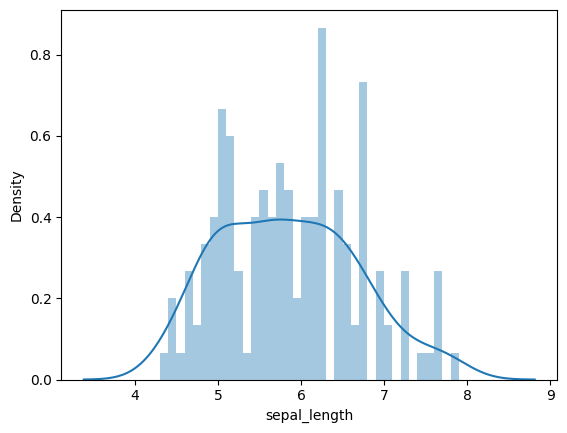

In [15]:
sns.distplot(
    iris["sepal_length"],
    hist = True,
    kde = True,
    bins = int(180 / 5)
)
plt.show()

Cálculo de la desviación estándar
$$\sigma^{2} = \frac{\sum_{i=1}^{n} 
  \left(x_{i} - \mu\right)^{2}}
  {N}$$


In [16]:
iris["sepal_length"].var()

0.6856935123042505

Cálculo de la desviación estándar
$$\sigma = \sqrt{\sigma}^{2} = \sqrt{\frac{\sum\limits_{i=1}^{n} \left(x_{i} - \mu\right)^{2}} {N}}$$

In [17]:
iris["sepal_length"].std()

0.8280661279778629

Creamos una muestra mediante el muestreo aleatorio simple

In [18]:
muestra = iris.sample(frac = 0.5)
muestra.head()

,sepal_length,sepal_width,petal_length,petal_width,species
79,5.7,2.6,3.5,1.0,versicolor
28,5.2,3.4,1.4,0.2,setosa
52,6.9,3.1,4.9,1.5,versicolor
73,6.1,2.8,4.7,1.2,versicolor
87,6.3,2.3,4.4,1.3,versicolor


Cálculo de la varianza

In [19]:
muestra["sepal_length"].var()

0.6236468468468469

Cálculo de la desviación estándar

In [20]:
muestra["sepal_length"].std()

0.789713142126207

#### Intervalos de confianza

Son un par o varios pares de números entre los cuales se estima que estará cierto valor desconocido respecto a un parámetro poblacional con un determinado nivel de confianza.

Estos valores se comportan de manera simétrica respecto a la media.

**Nivel de significación**

El nivel de significación **alpha** es el nivel límite para juzgar si un resultado es o no es estadísticamente significativo. Si el valor de significación es menor que el nivel de significación entonces el resultado es estadísticamente significativo.

![](significacion.PNG)

**Interpretación del resultado**

Intervalo de confianza del 95%: sabemos que con un 95% de certeza las edades de las personas que esquían entán en un intervalo, entre un valor y otro.

![](conf.PNG)

##### Cálculo de intervalos de confianza

**Ejemplo 1**

No conocemos información de la población; estamos intentando calcular con un 95% de certidumbre entre qué valor mínimo y máximo se encuentra la población. Eso significa que el 5% va a estar distribuido entre la izquierda y la derecha:
![](ejer1.PNG)

Tenemos la *z-table* para encontrar todos los valores en función de nuestro índice de confianza. Como hablamos del 95% (confianza) le sumamos el 2.5% (alpha / 2) y este valor del 97.5% es el que buscamos en la tabla.
![](ztable.PNG) <br>
![](z-table2.PNG)

Como vemos, obtenemos el valor 1.96.

Ahora, si consideramos el 0 como nuestra media entonces tendremos al lado izquierdo el -1.96 y al lado derecho el 1.96; esto significa que nuestro valor está entre [-1.96, 1.96].

**Ejemplo 2**

La duración de un cepillo de dientes se ajusta a una distribución normal(28, 4). ¿Cuál es el intervalo de confianza al 80%?
![](ejer2.PNG)

Como tenemos el 80% de confianza entonces el valor de alpha es 20% que se distribuye entre el 10% a la izquierda y el 10% a la derecha; de esta forma, el valor que debemos buscar es el de 80% + 10%, o sea, 90%
![](z-table3.PNG)

Nos queda entonces el intervalo [-1.28, 1.28]. Pero esto es para una media de 0 así que debemos ajustarlo a nuestra media de 28 con la fórmula:
$$ Z = \frac{x - \mu}{\delta}$$

![](ejer2res.PNG)

**Utilizando Scipy**

Creamos una distribución

In [21]:
np.random.seed(20) 
var1 = np.random.randint(0, 10, 10) # Días de vacaciones
var2 = var1 + np.random.normal(0, 1, 10) # Dinero gastado
print(var1, var2, sep = "\n")

[3 9 4 6 7 2 0 6 8 5]
[1.91516741 9.55969629 4.93946935 5.02151896 7.50309684 2.40641447
 0.32346101 5.50658912 7.20798321 4.15763207]


Visualizamos los resultados con un intervalo de confianza del 80%

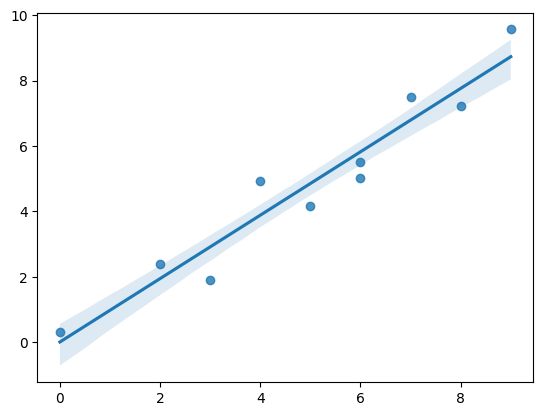

In [22]:
sns.regplot(
    x = var1, 
    y = var2,
    # Intervalo de confianza del 80%
    ci = 80
)
plt.show()

Unimos las dos variables en una tupla

In [23]:
# Unimos las variables var1 y var2 (estamos creando un tuple) a partir de zip
tuple = list(zip(var1, var2))
tuple

[(3, 1.9151674126826672),
 (9, 9.559696289403918),
 (4, 4.939469349856077),
 (6, 5.021518957881304),
 (7, 7.503096840109191),
 (2, 2.406414468894801),
 (0, 0.3234610099156434),
 (6, 5.50658911809112),
 (8, 7.207983209222818),
 (5, 4.157632065861516)]

Transformamos la tupla en un dataframe

In [24]:
# Transformamos el tuple a un data frame a partir de DataFrame
tabla = pd.DataFrame(tuple,
                  columns = ['Días_vacaciones', 'Dinero_gastado'])
tabla

,Días_vacaciones,Dinero_gastado
0,3,1.915167
1,9,9.559696
2,4,4.939469
3,6,5.021519
4,7,7.503097
5,2,2.406414
6,0,0.323461
7,6,5.506589
8,8,7.207983
9,5,4.157632


Calculamos un intervalo de confianza del 95%

In [25]:
# Calcular los intervalos de confianza a un 95% para ambas variables
st.t.interval(alpha = 0.95, df = len(tabla) - 1, loc = np.mean(tabla), scale = st.sem(tabla)) 

d:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\alexg\AppData\Local\Temp\ipykernel_12356\968054851.py:2: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval(alpha = 0.95, df = len(tabla) - 1, loc = np.mean(tabla), scale = st.sem(tabla))


(array([3.00496491, 2.84767315]), array([6.99503509, 6.86053259]))

También se puede usar la función *st.norm.interval* para cuando se tiene una cantidad de muestras (n) mayor o igual a 30, esto debido a que con esta cantidad de muestras se puede asumir que los datos están normalmente distribuidos (teorema del limite central).

En resumen:
- Si n<30 usamos st.t.interval
- Si n>=30 usamos st.norm.interval

### Pruebas de hipótesis y validación


Una prueba de hipótesis nos ayuda a juzgar si existe una diferencia significativa entre el tamaño de la muestra y el parámetro general. Es decir, comprobamos si sobre una teoría, una hipótesis que tenemos, hay alguna diferencia entre los dos casos. Por ejemplo, podemos preguntarnos si en las ciudades más frías las personas viven más, en el caso de que sí vivan más estaríamos demostrando lo contrario a lo que queremos, ya que esperamos que vivan lo mismo y esto sería nuestra hipótesis nula (**H0**): la gente vive igual en un lugar frío o en un lugar cálido ya que es no más "normal" y quedaría dentro de la distribución central; pero si en los países cálidos o en los países fríos la población vive más entonces estaríamos rechazando nuestra hipótesis y nos iríamos por una alternativa (**H1**).

![](hipotesis.PNG)


Los pasos a seguir son:
1. Establecer una hipótesis nula **H0** y una hipótesis alternativa **H1**.
2. Seleccionar el **nivel de significancia**.
3. Seleccionar el **estadístico de prueba**.
4. Formular la regla de decisión.
5. Interpretar los resultados y tomar una decisión.

- H0 = la hipótesis más aceptada: las ventas de cerveza son las mismas en cualquier época del año. la gente vive lo mismo en todos los países.
- H1: en verano se vende más cerveza. la gente vive más en países nórdicos.
- Seleccionar el nivel de significancia: con qué certidumbre queremos encontrar estas diferencias entre las distribuciones.
- Seleccionar el estadístico de prueba; tenemos: t de student(en poblaciones pequeñas, sin datos de distribución), coeficiente pearson(medir correlación) o ANOVA (comparar la varianza de las distribuciones)
- Formular la regla de decisión; por ejemplo: si para el 99% de seguridad tenemos una diferencia vamos a hacer un cambio en la empresa.
- Interpretar los resultados y tomar una decisión. si H(1) es real entonces hay que incrementar nuestro marketing en verano.

#### Tipos de pruebas de hipótesis

![](tiposTest.png)

##### Distribución T de Student

Se usa para estimar una media poblacional normalmente distribuida a partir de una muestra pequeña que sigue una distribución normal y de la que desconocemos la desviación estándar.
![](t.PNG)

Este tipo de validación se usa cuando la muestra es pequeña y desconocemos la desviación estándar.

##### Coeficiente de Pearson

Se usa para medir la dependencia lineal (correlación) entre dos variables aleatorias cuantitativas.

![](pearson.PNG)

##### Análisis de la varianza ANOVA

Se usa para comparar las varianzas entre las medias de diferentes grupos para llegar a la conclusión de si existen o no diferencias significativas.

![](anova.PNG)

#### Tipos de errores

Las conclusiones a las que llegamos se basan en una muestra, por lo que podemos equivocarnos.

**Decisiones correctas**
- Rechazar H0 cuando es falsa.
- No rechazar H0 cuando es verdadera.

**Decisiones incorrectas**
- Rechazar H0 cuando es verdadera.
- No rechazar H0 cuando es falsa.

![](tipoerrores.png)

![](tiposErrores.jpg)

**Ejemplo**

![](ejemploErrores.png)

#### Ejemplo de pruebas de hipótesis

Utilizamos nuevamente el dataset *iris*

In [26]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


##### Distribución T de Student

Vamos a seleccionar dos variables numéricas, *sepal_length* y *sepal_width* para ver si hay alguna diferencia entre ambas: 
- H0: se distribuyen similar.
- H1: no se distribuyen similar.

Lo primero que debemos calcular es el error estándar: 

![](se.png)


In [28]:
seLength = iris["sepal_length"].std() / np.sqrt(10)
seWidth = iris["sepal_width"].std() / np.sqrt(10)

Ahora debemos calcular el standar error deviation:

![](sed.jpg)


In [29]:
sed = np.sqrt((seLength ** 2) + (seWidth ** 2))

Y ahora calculamos el estadístico t:

![](t0.png)
![](t1.png)

In [30]:
tStat = (iris["sepal_length"].mean() - iris["sepal_width"].mean()) / sed
tStat

9.414779428410265

Ahora calculamos el p-valor con *ttest_ind*:

In [31]:
p = ttest_ind(iris["sepal_length"], iris["sepal_width"])
p

Ttest_indResult(statistic=36.463283934449116, pvalue=7.027919392009369e-112)

Nuestro estadístico T es 9.41 y el p-valor es muy muy muy pequeño; |T| > |p-valor| y por tanto rechazamos la hipótesis nula de que sepal_length y sepal_width se distribuyen similar. Las distribuciones de ambas variables son diferentes.

##### Correlación y Coeficiente de Pearson

Estudiamos la correlación entre *sepal_lenght* y *sepal_width*:
- H0: ambas variables no están correlacionadas.
- H1: ambas variables están correlacionadas.

In [32]:
iris["sepal_length"].corr(iris["sepal_width"])

-0.11756978413300198

Parece una correlación muy débil o inexistente.

Ahora estudiamos la correlación de Pearson entre ambas variables

In [33]:
st.pearsonr(iris["sepal_length"], iris["sepal_width"])

PearsonRResult(statistic=-0.11756978413300206, pvalue=0.15189826071144766)

Comparando entonces |-0.11| y |0.15| vemos que el p-valor es mayor y por tanto no se rechaza la hipótesis nula, es decir, ambas variables no están correlacionadas.

##### Análisis de la varianza ANOVA

Queremos ver si existen una diferencia entre la distribución de una variable respecto a la otra.

In [35]:
f_oneway(iris["sepal_length"], iris["sepal_width"])

F_onewayResult(statistic=1329.571075284254, pvalue=7.027919392009998e-112)

F Test es 1329.57 y su pvalue correspondiente es 7.02e-112. Dado que es un número inferior a 0.05 rechazamos la hipótesis nula de que las medias entre variables son similares y concluimos que sí hay diferencias.


#### Bootstrapping

Es un método de remuestreo de datos dentro de una muestra aleatoria usado para hallar una aproximación a la distribución de la variable analizada. Es muy útil cuando la población es pequeña o cuando las distribuciones son muy sesgadas.

![](boostrapping.PNG)

Partimos de una muestra y de esta muestra volvemos a obtener una muestra, o sea, una muestra de la muestra. Es con reemplazo porque la muestra original siempre mantiene todos sus elementos. Estos remuestreos podemos obtenerlos *n* veces y por ello es un método muy versátil además que no asume criterios sobre la población. Lo ideal es hacer más de 1000 iteraciones.

Creamos una muestra aleatoria de 10000 personas que tienen una edad promedio de 34 años.

In [37]:
data = np.random.normal(loc = 34, size = 10000)
data

array([32.72049734, 34.24571517, 33.9558052 , ..., 33.4997036 ,
       31.95154722, 32.50619463])

Comprobamos el promedio de nuestros datos

In [38]:
data.mean()

34.01569046435315

Vamos a crear 40 muestras de tamaño 5 para estimar el promedio de la edad a partir de bootstrapping.

In [41]:
# Definimos una función para el bootstrapping que recibe n iteraciones para un tamaño de muestra size
def bootstrapping(n, size):
    # Lista que guardará los promedios de las muestras
    promedios = []
    
    # Hacemos el bootsrapping n veces
    for i in range(n):
        # Hacemos un muestreo aleatorio de tamaño size a partir del conjunto de datos 
        muestra = rd.sample(data.tolist(), size)
        # Calculamos la media de la muestra
        promedio = np.mean(muestra)
        # Guardamos la media
        promedios.append(promedio)
    
    # Retornamos la lista con las medias de los muestreos
    return promedios 

In [42]:
np.mean(bootstrapping(40, 5))

34.0652562080772

Cada vez obtendríamos un resultado diferente. El muestreo por bootstrapping saca promedios de una población creando muestras más pequeñas y se usa para DS e IA para evitar el overfitting. El sobreajuste es un error de modelado que se produce cuando una función se ajusta demasiado a un conjunto limitado de puntos de datos.

In [43]:
np.mean(bootstrapping(1000, 1000))

34.015090165394035

#### Validación cruzada

Es una técnica utilizada para evaluar los resultados de un análisis estadístico y garantizar que son independientes de la partición entre los datos de entrenamiento y prueba.

**Procedimiento**:
- Hay que dividir los datos de forma aleatoria en *K* grupos de tamaño similar.
- Usar *K-1* grupos para entrenar el modelo.
- Tomar uno de estos grupos para validar el modelo.
- Repetir *K* veces usando grupos distintos en cada iteración.

Importamos el conjunto de datos

In [44]:
df = pd.read_csv("cancerdata.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Definimos una variable predictiva *Y* categórica que nos dice si el cáncer es benigno o maligno a partir de las variables numéricas *X*.

In [45]:
X = df.iloc[:, 2:]
Y = df.iloc[:, 1]

X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [46]:
Y.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Hay 357 benignos y 212 malignos.

Ahora creamos la división entre el conjunto de testing y el conjunto de training.

In [49]:
# Definimos que el conjunto de testing tendrá el 30%; el random state define el nivel de precisión
XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size = 0.3, random_state = 4)

Creamos el modelo de árbol de decisión

In [50]:
# Creamos el modelo
model = DecisionTreeClassifier()
# Ajustamos el modelo al conjunto de training
model.fit(XTrain, YTrain)
# Pedimos el puntaje del modelo con el conjunto de testing, o sea, la precisión
result = model.score(XTest, YTest)
print(result)

0.9005847953216374


Ahora hacemos la validación cruzada con K Fold

In [53]:
model = DecisionTreeClassifier()
# Queremos 10 folds
kFoldValidation = KFold(10)

# Sacamos el promedio de las 10 observaciones
results = cross_val_score(model, X, Y, cv = kFoldValidation)
print(results, results.mean(), sep = "\n\n")

[0.9122807  0.9122807  0.87719298 0.94736842 0.94736842 0.98245614
 0.89473684 0.94736842 0.94736842 0.94642857]

0.931484962406015
